<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/Modelo_entrenado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Utilizar una matriz de peso de un modelo pre-entrenado

In [ ]:
#Carpeta para los pesos del modelo entrebado
!mkdir '/trained'

Si las matrices de pesos se encuentran en nuestra unidad de Drive, ejecutar las siguientes 3 celdas

In [19]:
#Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El nombre del archivo donde se guardaron nuestros pesos tiene el nombre signatrix_efficientdet_coco seguido de la fecha en que se cargaron a Google Drive y es el nombre que colocamos donde están los ## en las siguientes celdas

In [24]:
!cp '/content/drive/MyDrive/##.onnx' '/trained/signatrix_efficientdet_coco.onnx'

In [25]:
!cp '/content/drive/MyDrive/##.pth' '/trained/signatrix_efficientdet_coco.pth'

Si desea cargar las matrices de pesos del modelo final con 150 épocas, ejecutar las siguientes 3 celdas

In [2]:
! git clone https://github.com/FERMEN23/CNN

Cloning into 'CNN'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 133 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 15.74 MiB | 11.26 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [5]:
!cp '/content/CNN/Matrices_de_pesos_en_150_epocas/signatrix_efficientdet_coco_2021-11-04-01_59.onnx' '/trained/signatrix_efficientdet_coco.onnx'

In [7]:
!cp '/content/CNN/Matrices_de_pesos_en_150_epocas/signatrix_efficientdet_coco_2021-11-04-01_59.pth' '/trained/signatrix_efficientdet_coco.pth'

Clonar Repositorio para la detección de Objetos

In [8]:
%%time
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 27.88 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
CPU times: user 102 ms, sys: 22.2 ms, total: 124 ms
Wall time: 7.57 s


In [9]:
%%time
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

     |████████████████████████████████| 352.6 MB 14 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=a94d07af56838c703cc3bf7815f16072c4b355e3c594ad1f051a535668c8b536
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-4b3j075h/pycocotools_a042233b959346b488060467999bc169
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-4b3j075h/pycocotools_a042233b959346b488060467999bc169
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263850 sha256=ead2f9350eb997007105c252f6fba43e45e436813765a03bbce8dab362d56bd8
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [10]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [11]:
%%time
from train_detector import Detector

CPU times: user 1.1 s, sys: 886 ms, total: 1.99 s
Wall time: 26 s


In [12]:
from infer_detector import Infer
gtf = Infer();

In [26]:
#Nuestros pesos de modelos entrenados están en la carpeta tained en formato onxx
gtf.Model(model_dir="/trained")

In [14]:
#Descargar el conjunto de prueba del conjunto de datos, la palabra ENLACE hace referncia al código de descarga del conjunto de datos públicos de Roboflow
!curl -L "ENLACE" | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0   1706      0 --:--:-- --:--:-- --:--:--  1706
 99 38.9M   99 38.8M    0     0  30.5M      0  0:00:01  0:00:01 --:--:-- 91.2M
curl: (23) Failed writing body (1335 != 8192)


In [27]:
%%time
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])


CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 15.6 ms


In [28]:
class_list

['vehicles', 'Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

In [29]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.204s)
CPU times: user 208 ms, sys: 28 ms, total: 236 ms
Wall time: 239 ms


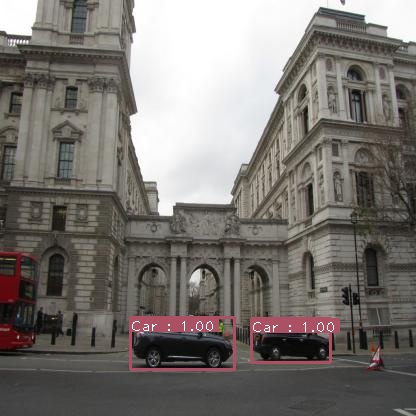

In [30]:
from IPython.display import Image
Image(filename='output.jpg')